In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

e:\Downloads\Python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_skills'>

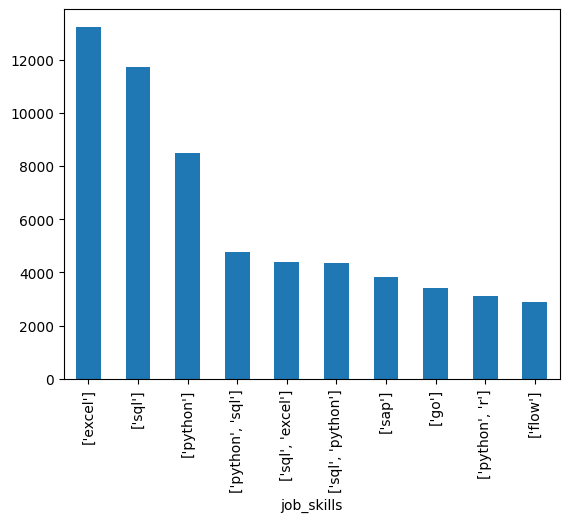

In [5]:
df_exploded = df.explode('job_skills')

df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [11]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [13]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
19078,Data Analyst,['excel'],8095
49382,Data Analyst,['sql'],4997
136380,Data Scientist,['python'],4659
35354,Data Analyst,"['sql', 'excel']",3020
1233,Business Analyst,['excel'],2443
...,...,...,...
12,Business Analyst,"['alteryx', 'tableau', 'power bi', 'excel']",1
13,Business Analyst,"['alteryx', 'tableau', 'power bi', 'looker']",1
14,Business Analyst,"['alteryx', 'tableau', 'qlik']",1
19,Business Analyst,"['angular', 'excel', 'tableau']",1


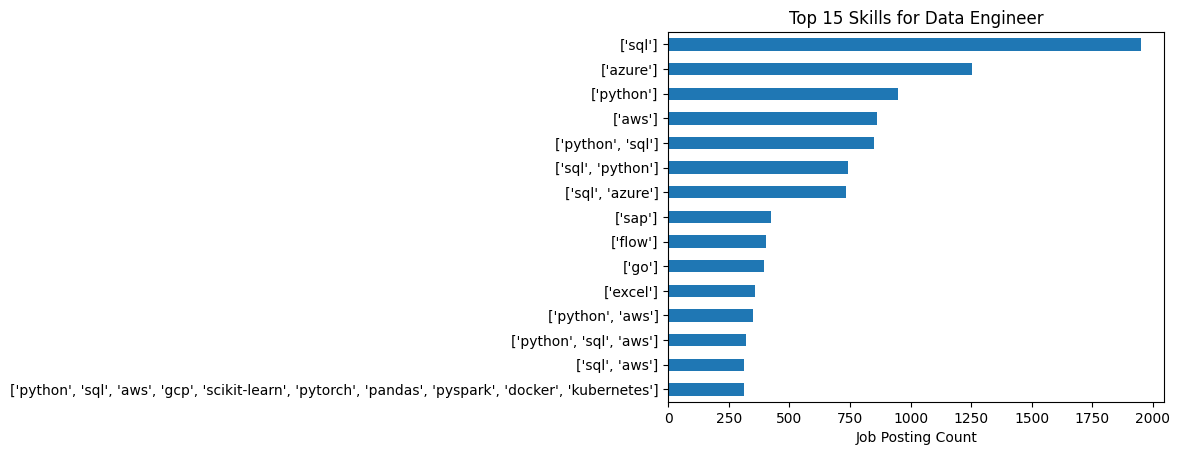

In [21]:
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', legend=False, title=f'Top {top_skills} Skills for {job_title}')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()